<a href="https://colab.research.google.com/github/viniciusgomesbatista/pythonintermediario/blob/main/S%C3%A9ries%20Temporais/S%C3%A9ries_Tempor%C3%A1is.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importar as nossas libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

O Tráfego do Túnel é uma série temporal que descreve o número de veículos que viajam pelo Túnel Baregg, na Suíça, todos os dias, de novembro de 2003 a novembro de 2005.

In [2]:
tunnel = pd.read_csv('/content/tunnel.csv')

In [3]:
tunnel.head()

,Day,NumVehicles
0,2003-11-01,103536
1,2003-11-02,92051
2,2003-11-03,100795
3,2003-11-04,102352
4,2003-11-05,106569


In [5]:
tunnel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Day          747 non-null    object
 1   NumVehicles  747 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


In [6]:
tunnel.describe()

,NumVehicles
count,747.00000
mean,106567.75502
std,12456.35049
min,53098.00000
25%,98794.00000
50%,108204.00000
75%,115477.00000
max,139840.00000


In [7]:
tunnel.describe(include='O')

,Day
count,747
unique,747
top,2003-11-01
freq,1


In [8]:
tunnel['Day'] = pd.to_datetime(tunnel['Day'])

In [9]:
tunnel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Day          747 non-null    datetime64[ns]
 1   NumVehicles  747 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 11.8 KB


In [10]:
print("A data inicial do refistro é:", tunnel['Day'].min())

A data inicial do refistro é: 2003-11-01 00:00:00


In [11]:
print("A data final do refistro é:", tunnel['Day'].max())

A data final do refistro é: 2005-11-16 00:00:00


array([<Axes: >, <Axes: >], dtype=object)

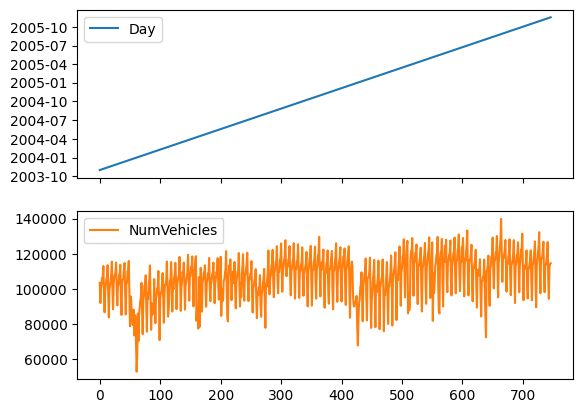

In [12]:
#plotar meus dados
tunnel.plot(subplots=True)

## Fazer a análise em relação a dia, mês e ano

In [14]:
tunnel['day_date'] = tunnel['Day'].dt.day

In [15]:
tunnel.head()

,Day,NumVehicles,day_date
0,2003-11-01,103536,1
1,2003-11-02,92051,2
2,2003-11-03,100795,3
3,2003-11-04,102352,4
4,2003-11-05,106569,5


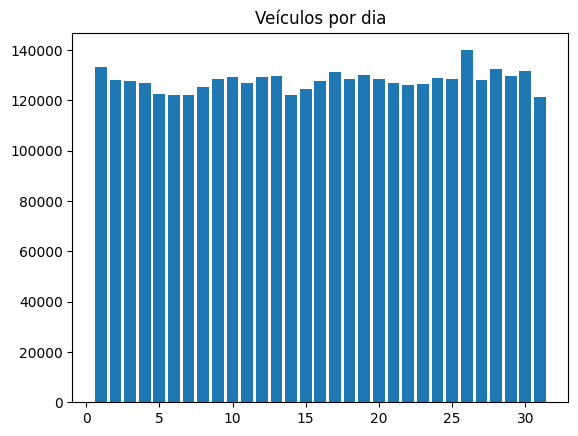

In [19]:
#plotar o meu gráfico
plt.bar(tunnel['day_date'], tunnel['NumVehicles'])
plt.title('Veículos por dia')
plt.show()

In [20]:
# por mês
tunnel['month'] = tunnel['Day'].dt.month
tunnel.head()

,Day,NumVehicles,day_date,month
0,2003-11-01,103536,1,11
1,2003-11-02,92051,2,11
2,2003-11-03,100795,3,11
3,2003-11-04,102352,4,11
4,2003-11-05,106569,5,11


In [22]:
agg= tunnel.groupby('month')['NumVehicles'].sum().reset_index()
agg.head()

,month,NumVehicles
0,1,5878280
1,2,5674446
2,3,6657960
3,4,6462421
4,5,6624171


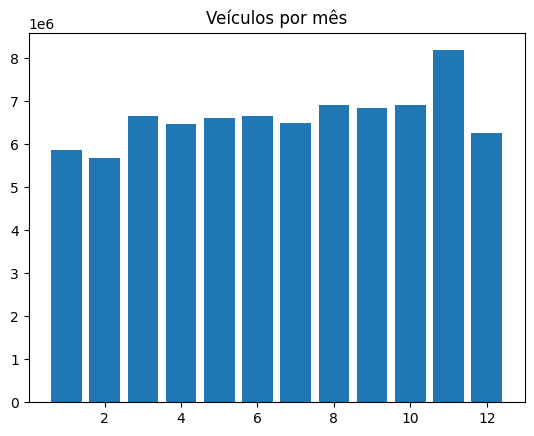

In [24]:
#plotar o meu gráfico
plt.bar(agg['month'], agg['NumVehicles'])
plt.title('Veículos por mês')
plt.show()

In [25]:
#por ano
tunnel['year'] = tunnel['Day'].dt.year
tunnel.head()

,Day,NumVehicles,day_date,month,year
0,2003-11-01,103536,1,11,2003
1,2003-11-02,92051,2,11,2003
2,2003-11-03,100795,3,11,2003
3,2003-11-04,102352,4,11,2003
4,2003-11-05,106569,5,11,2003


In [26]:
tunnel['year'].unique()

array([2003, 2004, 2005], dtype=int32)

In [27]:
agg_year = tunnel.groupby('year')['NumVehicles'].sum().reset_index()
agg_year.head()

,year,NumVehicles
0,2003,6067066
1,2004,38270421
2,2005,35268626


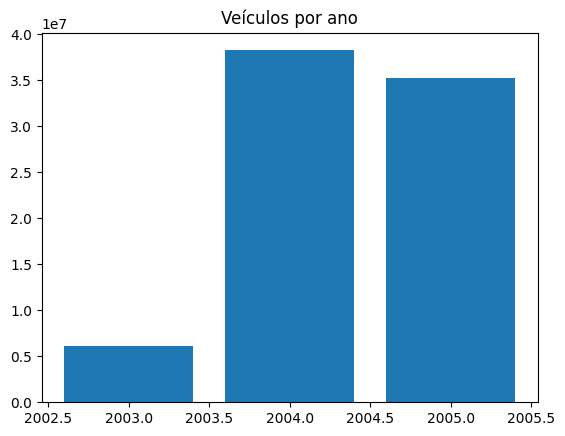

In [30]:
#plotar o meu gráfico
plt.bar(agg_year['year'], agg_year['NumVehicles'])
plt.title('Veículos por ano')
plt.show()

In [32]:
# por dia da semana
tunnel['weekday'] = tunnel['Day'].dt.weekday
tunnel.head()

,Day,NumVehicles,day_date,month,year,weekday
0,2003-11-01,103536,1,11,2003,5
1,2003-11-02,92051,2,11,2003,6
2,2003-11-03,100795,3,11,2003,0
3,2003-11-04,102352,4,11,2003,1
4,2003-11-05,106569,5,11,2003,2


In [35]:
agg_wd = tunnel.groupby('weekday')['NumVehicles'].sum().reset_index()
agg_wd.head()

,weekday,NumVehicles
0,0,11237805
1,1,11520830
2,2,11912333
3,3,11867771
4,4,12553585


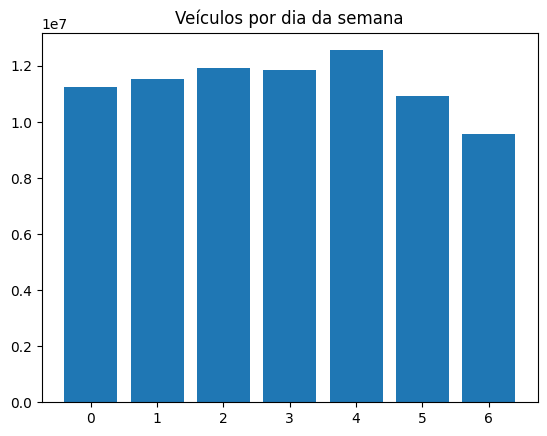

In [36]:
#plotar o meu gráfico
plt.bar(agg_wd['weekday'], agg_wd['NumVehicles'])
plt.title('Veículos por dia da semana')
plt.show()

In [38]:
# lag - atraso
tunnel['lag_1'] = tunnel['NumVehicles'].shift(1)
tunnel.head()

,Day,NumVehicles,day_date,month,year,weekday,lag_1
0,2003-11-01,103536,1,11,2003,5,NaN
1,2003-11-02,92051,2,11,2003,6,103536.0
2,2003-11-03,100795,3,11,2003,0,92051.0
3,2003-11-04,102352,4,11,2003,1,100795.0
4,2003-11-05,106569,5,11,2003,2,102352.0


In [39]:
# Correlação entre as variáveis criadas
tunnel.corr()

,Day,NumVehicles,day_date,month,year,weekday,lag_1
Day,1.000000,0.389729,0.012453,0.124604,0.887338,-0.003485,0.389108
NumVehicles,0.389729,1.000000,-0.004890,0.201098,0.275679,-0.289844,0.532835
day_date,0.012453,-0.004890,1.000000,-0.013338,-0.020513,0.004984,0.018046
month,0.124604,0.201098,-0.013338,1.000000,-0.345358,-0.008350,0.223113
year,0.887338,0.275679,-0.020513,-0.345358,1.000000,0.000371,0.264223
weekday,-0.003485,-0.289844,0.004984,-0.008350,0.000371,1.000000,0.394667
lag_1,0.389108,0.532835,0.018046,0.223113,0.264223,0.394667,1.000000
